## CS 484 - 001 Introduction to Computer Vision
HW1   
Mohammed S. Yaseen - 21801331

#### Import libraries

In [75]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

### Q1 Dilation and Erosion 

#### Function definitions

In [76]:
# This function takes an image source and a structuring element and 
# dilates the image using the provided structuring element.
def diltion(src_img, struct_el):
    output = np.copy(src_img)
    struct_el_center_i = math.floor(struct_el.shape[0]/2)
    struct_el_center_j = math.floor(struct_el.shape[1]/2)

    # iterate over the image 
    for i in range(len(src_img)):
        for j in range(len(src_img[i])):
            if src_img[i][j] == 1 and i > struct_el_center_i and j > struct_el_center_j:
                portion_of_output = output[i-struct_el_center_i:i+struct_el_center_i+1, j-struct_el_center_j:j+struct_el_center_j+1]

                # Update a portion of the original image based on the structure element
                for k in range(portion_of_output.shape[0]):
                    for l in range(portion_of_output.shape[1]):
                        if portion_of_output[k][l] == 0:
                            portion_of_output[k][l] = struct_el[k][l]
    
    return output

In [77]:

# This function takes an image source and a structuring element and 
# erode the image using the provided structuring element.
def erosion(src_img, struct_el):
    output = np.zeros(shape=src_img.shape)
    struct_el_center_i = math.floor(struct_el.shape[0]/2)
    struct_el_center_j = math.floor(struct_el.shape[1]/2)


    # iterate over the image 
    for i in range(len(src_img)):
        for j in range(len(src_img[i])):
            if src_img[i][j] == 1 and i > struct_el_center_i and j > struct_el_center_j:
                portion_of_output = src_img[i-struct_el_center_i:i+struct_el_center_i+1, j-struct_el_center_j:j+struct_el_center_j+1]

                if np.array_equal(portion_of_output, struct_el):
                    output[i][j] = 1
    
    return output

#### Read the image and apply the filters

show the original image

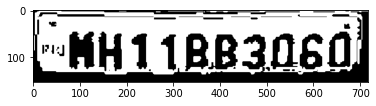

In [78]:
im = cv2.imread('assets/binary_image.png', cv2.IMREAD_GRAYSCALE)
im = im/255

plt.imshow(im, cmap='gray')

# Revert the image to make it compatible with
# the dilation and erosion functions
im = 1 - im

Define the kernal

In [79]:
kernel = np.ones((5,5), np.uint8)

Apply the dilation and show the image after dilation

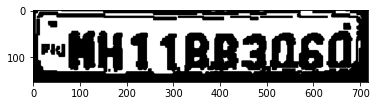

In [80]:
output_im = diltion(im, kernel)

output_im = 1 - output_im
plt.imshow(output_im, cmap='gray')

Apply the erosion and show the image after erosion

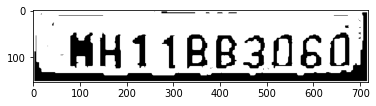

In [81]:
output_im = erosion(im, kernel)

output_im = 1 - output_im
plt.imshow(output_im, cmap='gray')

### Q2 Creating a Histogram from Image

#### Function Definition

In [82]:
# This function gets an image and generates a histogram and plot it.
def histogram(src_img):
    # flattenthe image to one dimensional array
    flat_im = src_img.flatten()
    hist, bin_edges = np.histogram(flat_im, bins=256)
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_mids, hist)
    plt.title("histogram") 
    plt.show()

#### Read the images and generate histograms

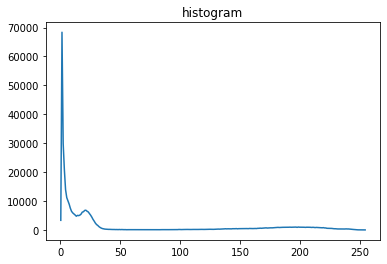

In [83]:
im1 = cv2.imread('assets/grayscale_1.jpg', cv2.IMREAD_GRAYSCALE)
histogram(im1)

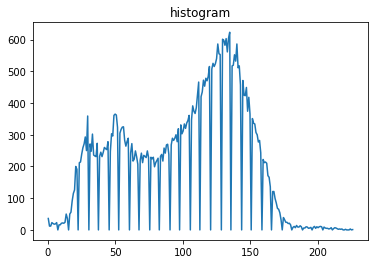

In [84]:
im2 = cv2.imread('assets/grayscale_2.jpg', cv2.IMREAD_GRAYSCALE)
histogram(im2)

### Q3 Thresholding with Otsu's method

#### Function Definitions

In [85]:
# this function would find Otsu's threshold given a source image
def find_threshold(src_img):
    bins_num = 256

    flat_im = src_img.flatten()
    hist, bin_edges = np.histogram(flat_im, bins=bins_num)

    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

    w1 = np.cumsum(hist)
    w2 = np.cumsum(hist[::-1])[::-1]

    m1 = np.cumsum(hist * bin_mids) / w1
    m2 = (np.cumsum((hist * bin_mids)[::-1]) / w2[::-1])[::-1]

    ic_variance = w1[:-1] * w2[1:] * (m1[:-1] - m2[1:]) ** 2
    threshold = bin_mids[:-1][np.argmax(ic_variance)]

    return threshold

In [86]:
# this function would recolor the image using Otsu's threshold
def otsu_threshold(src_im):
    threshold = find_threshold(im)
    return np.array([(lambda x: [(lambda y: 1 if y >= threshold else 0)(y) for y in x] )(x) for x in src_im])

#### Read the images and apply the filter

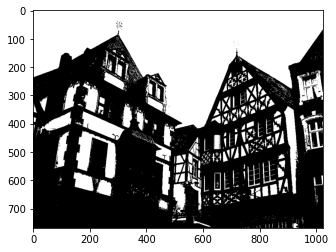

In [87]:
im = cv2.imread('assets/otsu_1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(otsu_threshold(im), cmap='gray')

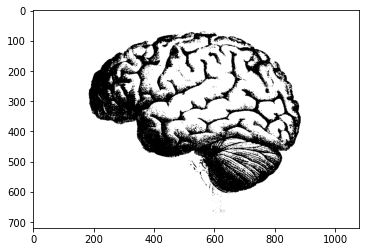

In [88]:
im = cv2.imread('assets/otsu_2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(otsu_threshold(im), cmap='gray')

#### Q4 Edge Detection

#### Function Definition

In [89]:
# this function would find the weigthed average of applying in_matrix_2 to in_matrix_1
def calculate_kernal_applied(in_matrix_1, in_matrix_2):
    mult = np.multiply(in_matrix_1, in_matrix_2)
    sum = np.sum(mult)
    out = sum/(in_matrix_2.shape[0]*in_matrix_2.shape[1])
    return out

In [90]:
# This function would convolve the source image with the given kernal
def convolve(im, kernal):
    kernal_center_i = math.floor(kernal.shape[0]/2)
    kernal_center_j = math.floor(kernal.shape[1]/2)
    out_im = np.ones(im.shape)

    for m in range(kernal_center_i, im.shape[0] - kernal_center_i):
        for n in range(kernal_center_j, im.shape[1] - kernal_center_j):
            out_im[m][n] = calculate_kernal_applied(im[m-kernal_center_i:m+kernal_center_i+1, n-kernal_center_j:n+kernal_center_j+1], kernal)
    
    return out_im

#### Load image and apply sobel filter

Load and view the original image

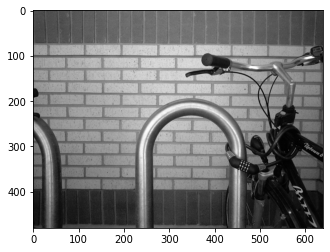

In [91]:
im = cv2.imread('assets/filter.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(im, cmap='gray')

Define sobel x and y filters

In [92]:
sobel_x_operator = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_operator = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

Convolve the image with sobel kernel

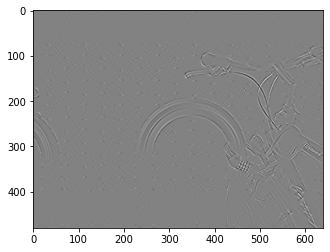

In [93]:
x_out_im = convolve(im, sobel_x_operator)
out_im = convolve(x_out_im, sobel_y_operator)
plt.imshow(out_im, cmap='gray')